# Plotting examples

Examples of how to plot with GMAG. These examples are used in the GMAG Frontier Manuscript.


In [8]:
%matplotlib notebook

## THEMIS plot, Figure XX

File thg_l2_mag_snkq_20110409_v01.cdf exists use force=True to download
Loading: D:\data\magnetometer\THEMIS\snkq\2011\thg_l2_mag_snkq_20110409_v01.cdf


<IPython.core.display.Javascript object>


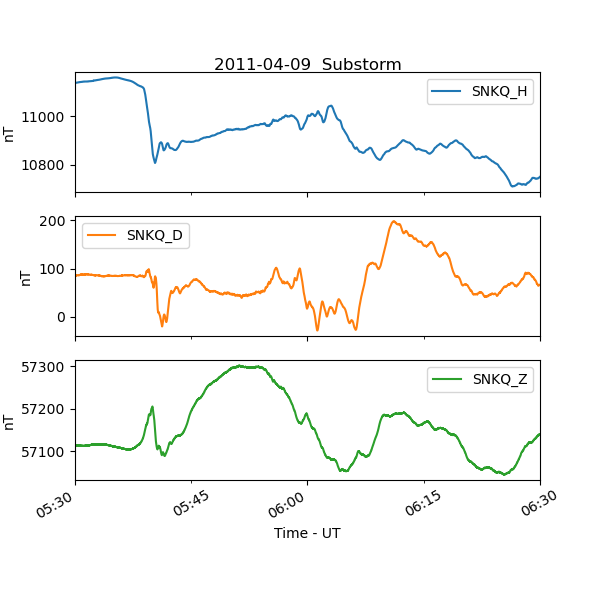

Text(0.5, 3.35, '2011-04-09  Substorm')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import gmag.arrays.themis as themis

sdate = '2011-04-09 05:30:00'
edate = '2011-04-09 06:30:00'

th_dat, th_meta = themis.load(['SNKQ'],sdate,ndays=1)
th_dat[sdate:edate].plot(ylabel='nT', xlabel='Time - UT', figsize=[6,6],subplots=True)
plt.title(sdate[0:11]+' Substorm',y=3.35)

In [10]:
plt.savefig('C:\\Users\\krmurph1\\OneDrive\\GMAG_Frontiers\\TH_substorm_example.png',bbox_inches='tight')

# CARISMA substorm plot, multiple stations

Plot H component data from multiple stations apart of the CARISMA array. 

File 20050717GILL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717GILL.F01.gz
File 20050717ISLL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717ISLL.F01.gz
File 20050717PINA.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717PINA.F01.gz
File 20050717RABB.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717RABB.F01.gz
File 20050717FSMI.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717FSMI.F01.gz
File 20050717FSIM.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717FSIM.F01.gz
File 20050717MCMU.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717MCMU.F01.gz


<IPython.core.display.Javascript object>


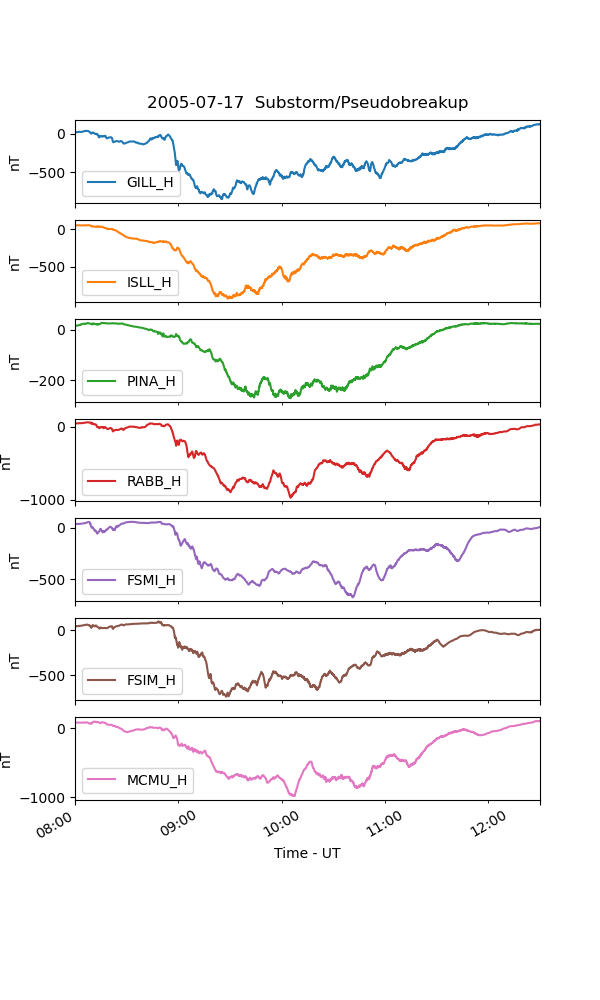

Text(0.5, 8.25, '2005-07-17  Substorm/Pseudobreakup')

In [11]:
import gmag.arrays.carisma as carisma
sdate = '2005-07-17 08:00:00'
edate = '2005-07-17 12:30:00'
car_dat, car_meta=carisma.load(['GILL','ISLL','PINA','RABB','FSMI','FSIM','MCMU'],sdate,ndays=1,drop_flag=True)

comp='H'
p_col = [col for col in car_dat.columns if col[-1] == comp]

car_dat[sdate:edate][p_col].subtract(car_dat[p_col].mean()).plot(ylabel='nT', xlabel='Time - UT',
                                                            figsize=[6,10],subplots=True)
plt.title(sdate[0:11]+' Substorm/Pseudobreakup',y=8.25)

In [12]:
plt.savefig('C:\\Users\\krmurph1\\OneDrive\\GMAG_Frontiers\\CA_substorm_example.png',bbox_inches='tight')

## CARISMA ULF waves stacked plot

In [13]:
sdate = '2014-11-05 13:25:00'
edate = '2014-11-05 14:25:00'
car_dat, car_meta=carisma.load(['PINA','ISLL','GILL','FCHU','RANK'],sdate,ndays=1,drop_flag=True)



File 20141105PINA.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105PINA.F01.gz
File 20141105ISLL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105ISLL.F01.gz
File 20141105GILL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105GILL.F01.gz
File 20141105FCHU.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105FCHU.F01.gz
File 20141105RANK.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105RANK.F01.gz


<IPython.core.display.Javascript object>


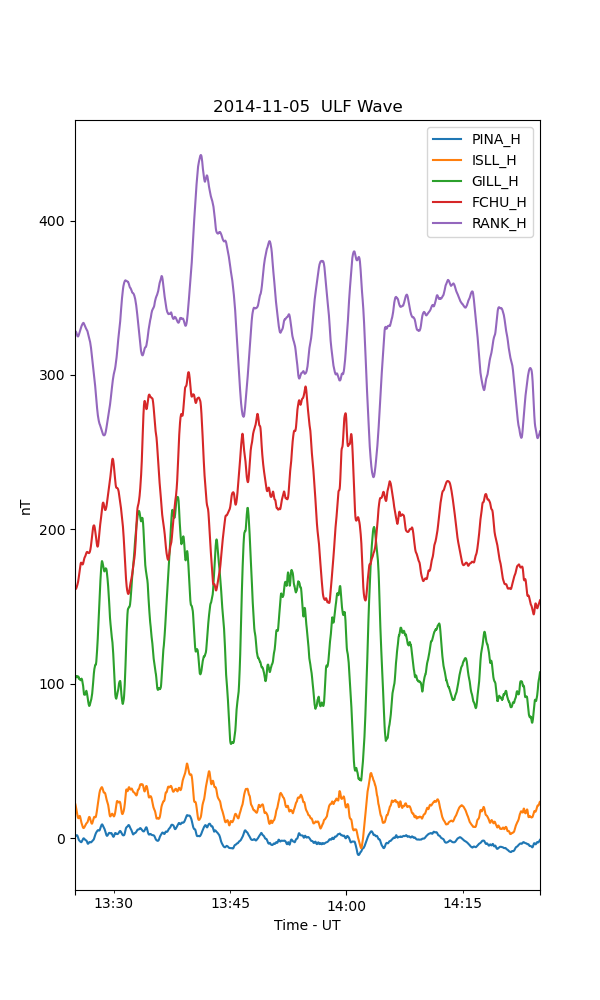

Text(0.5, 1.0, '2014-11-05  ULF Wave')

In [17]:
comp='H'
p_col = [col for col in car_dat.columns if col[-1] == comp]

y_shift = np.array([(val['max']-val['min'])/1.5 for col_h, val in car_dat[sdate:edate][p_col].describe().iteritems()])
y_shift = (y_shift-y_shift.min()).cumsum()


car_dat[sdate:edate][p_col].subtract(car_dat[sdate:edate][p_col].mean()-y_shift).plot(ylabel='nT', xlabel='Time - UT',
                                                            figsize=[6,10])
plt.title(sdate[0:11]+' ULF Wave')

In [18]:
plt.savefig('C:\\Users\\krmurph1\\OneDrive\\GMAG_Frontiers\\CA_ulf_example.png',bbox_inches='tight')